# **Importing Necessary Libraries!**

In [ ]:
import os
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

# **Starting Analytics**
- There are no headers in the **data**.
- It's in a different file.

In [ ]:
headers = [
    'Symboling',
    'Normalized-Losses',
    'Make',
    'Fuel-Type',
    'Aspiration',
    'Num-Of-Doors',
    'Body-Style',
    'Drive-Wheels',
    'Engine-Location',
    'Wheel-Base',
    'Length',
    'Width',
    'Height',
    'Curb-Weight',
    'Engine-Type',
    'Num-Of-Cylinders',
    'Engine-Size',
    'Fuel-System',
    'Bore',
    'Stroke',
    'Compression-Ratio',
    'Horsepower',
    'Peak-Rpm',
    'City-Mpg',
    'Highway-mpg',
    'Price']

url = "https://raw.githubusercontent.com/pri-cd/Data-Science-ML/main/IBM-Cognitive-Class/TempFiles/imports-85.data"
dfs = pd.read_csv(url, header=None)
dfs.columns = headers
dfs.head()

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,...,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-Rpm,City-Mpg,Highway-mpg,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
'''
  Or - dfs.describe(include='all')
'''
dfs.describe()

,Symboling,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Size,Compression-Ratio,City-Mpg,Highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
dfs.dtypes

,0
Symboling,int64
Normalized-Losses,object
Make,object
Fuel-Type,object
Aspiration,object
Num-Of-Doors,object
Body-Style,object
Drive-Wheels,object
Engine-Location,object
Wheel-Base,float64


# **Handing Missing Values**
- Drop the **Missing** values.
- Replace it with an Average (or, Frequency).
- Leave it as **Missing** Data.

In [ ]:
df = dfs.copy()
df.replace('?', np.nan, inplace=True)

# 1. Dropping NA Values
print(f"Before DropNa \"Price\": {df['Price'].isna().sum()}")
df.dropna(subset=['Price'], axis=0, inplace=True)
print(f"After DropNa \"Price\": {df['Price'].isna().sum()}")

# 2. Replacing With Mean Values!
print(f"Before Replace: {df['Normalized-Losses'].isna().sum()}")
df['Normalized-Losses'] = pd.to_numeric(df['Normalized-Losses'], errors='coerce')

mn = df['Normalized-Losses'].mean()
df['Normalized-Losses'].replace(np.nan, mn, inplace=True)
print(f"After Replace: {df['Normalized-Losses'].isna().sum()}")



Before DropNa "Price": 4
After DropNa "Price": 0
Before Replace: 37
After Replace: 0


# **Data Formatting**

In [ ]:
df['City-Mpg'] = 235/df['City-Mpg']
df.rename(columns={'City-Mpg': 'City-L/100km'}, inplace=True)
df.columns.tolist()

['Symboling',
 'Normalized-Losses',
 'Make',
 'Fuel-Type',
 'Aspiration',
 'Num-Of-Doors',
 'Body-Style',
 'Drive-Wheels',
 'Engine-Location',
 'Wheel-Base',
 'Length',
 'Width',
 'Height',
 'Curb-Weight',
 'Engine-Type',
 'Num-Of-Cylinders',
 'Engine-Size',
 'Fuel-System',
 'Bore',
 'Stroke',
 'Compression-Ratio',
 'Horsepower',
 'Peak-Rpm',
 'City-L/100km',
 'Highway-mpg',
 'Price']

# **Data Normalisation**

## Means
- Uniform the Feature values in Similar Range

## What is **"Not Normalised"** ?
- The Column `Age` and `Income` are not normalised
- Age is in 10s Range While Income is much higher.

## Techniques to Handle **Normalization**
- Simple Feature Scaling `((New Value) / (Max Value))`
- Min - Max `((Old - Min) / (Max - Min))`
- Z-Score `((Old - μ) / σ)`

In [ ]:
# Simple Feature Scaling!
temp1 = df.copy()
temp1['Length'] = temp1['Length']/temp1['Length'].max()
print("- Simple Feature Scaling")
print(temp1['Length'].head().round(2).tolist(), end='\n\n')
del(temp1)

# Min Max Method
temp2 = df.copy()
temp2['Length'] = (temp2['Length'] - temp2['Length'].min()) / (temp2['Length'].max() - temp2['Length'].min())
print("- Min Max")
print(temp2['Length'].head().round(2).tolist(), end='\n\n')
del(temp2)

# Z-Score Method
temp3 = df.copy()
temp3['Length'] = (temp3['Length'] - temp3['Length'].mean()) / temp3['Length'].std()
print('- Z-Score')
print(temp3['Length'].head().round(2).tolist(), end='\n\n')
del(temp3)

- Simple Feature Scaling
[0.81, 0.81, 0.82, 0.85, 0.85]

- Min Max
[0.41, 0.41, 0.45, 0.53, 0.53]

- Z-Score
[-0.44, -0.44, -0.24, 0.19, 0.19]



# **Binning In Python**
- Binning is the process of converting continuous data into discrete intervals.
- Simplify data by grouping ranges of values into smaller, categories.
- In Python, `pd.cut()` and `pd.qcut()` are commonly used for binning data.
- It is useful in tasks like histogram creation, categorization, or simplifying data for machine learning models.


### **Example**
- Price can be converted to: Low, Mid, High.

Unique: ['Low', 'Medium', 'High']


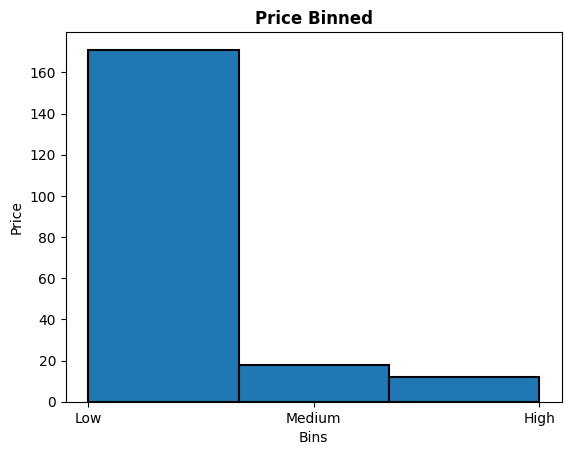

In [ ]:

df['Price'] = pd.to_numeric(df['Price'])
bins = np.linspace(min(df['Price']), max(df['Price']), 4)
groupNames = ['Low', 'Medium', 'High']
df['Price-Binned'] = pd.cut(df['Price'], bins=bins, labels=groupNames, include_lowest=True)
print(f"Unique: {df['Price-Binned'].unique().tolist()}")


plt.hist(df['Price-Binned'], bins=3, edgecolor='black', linewidth=1.5)
plt.xlabel('Bins')
plt.ylabel('Price')
plt.title('Price Binned', fontweight='bold')
plt.show()

# **Encoding Values**
- Turning **Categorical** values -> **Numerical** values.
- Because, The pandas can't process the **String** values.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
'''
  OneHotEncoder Created Different Columns for Each Category.
  Whereas, I wished to Achieve to replace simply replace the values with 0, 1, ... as required to category -> Numeric Conversion!.
  "replace()" method would also work here.. using "unique()" method.
'''

df["Fuel-Type"].unique().tolist()
le = LabelEncoder()
df['Fuel-Type'] = le.fit_transform(df['Fuel-Type'])
print(df['Fuel-Type'].unique().tolist())

[1, 0]
